## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [5]:
data_matrix = np.column_stack((X, y))
np.random.seed(42)
np.random.shuffle(data_matrix)
data_matrix

array([[  5.30612245,  -9.6122449 ],
       [ 15.91836735, -30.83673469],
       [ 12.24489796, -23.48979592],
       [ 18.36734694, -35.73469388],
       [  6.93877551, -12.87755102],
       [ 19.59183673, -38.18367347],
       [ 10.6122449 , -20.2244898 ],
       [ 10.20408163, -19.40816327],
       [ 13.06122449, -25.12244898],
       [  7.75510204, -14.51020408],
       [  4.89795918,  -8.79591837],
       [  1.63265306,  -2.26530612],
       [ 15.10204082, -29.20408163],
       [  3.26530612,  -5.53061224],
       [  1.2244898 ,  -1.44897959],
       [  2.44897959,  -3.89795918],
       [ 16.73469388, -32.46938776],
       [ 18.7755102 , -36.55102041],
       [ 19.18367347, -37.36734694],
       [  6.12244898, -11.24489796],
       [  3.67346939,  -6.34693878],
       [  6.53061224, -12.06122449],
       [  9.79591837, -18.59183673],
       [ 13.87755102, -26.75510204],
       [ 12.65306122, -24.30612245],
       [  0.        ,   1.        ],
       [ 17.95918367, -34.91836735],
 

In [6]:
X=data_matrix[:,0]
y=data_matrix[:,1]
y

array([ -9.6122449 , -30.83673469, -23.48979592, -35.73469388,
       -12.87755102, -38.18367347, -20.2244898 , -19.40816327,
       -25.12244898, -14.51020408,  -8.79591837,  -2.26530612,
       -29.20408163,  -5.53061224,  -1.44897959,  -3.89795918,
       -32.46938776, -36.55102041, -37.36734694, -11.24489796,
        -6.34693878, -12.06122449, -18.59183673, -26.75510204,
       -24.30612245,   1.        , -34.91836735, -21.04081633,
       -25.93877551,  -3.08163265, -22.67346939,  -7.97959184,
       -28.3877551 ,   0.18367347, -16.14285714,  -0.63265306,
       -34.10204082, -27.57142857, -17.7755102 , -31.65306122,
        -7.16326531, -16.95918367, -13.69387755, -39.        ,
       -15.32653061,  -4.71428571, -33.28571429, -10.42857143,
       -21.85714286, -30.02040816])

### Plot X vs. y

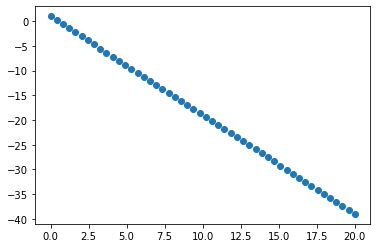

In [7]:
plt.scatter(X,y)

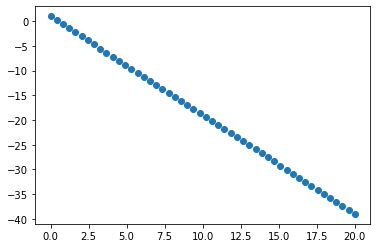

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

ones_column = np.ones((X.shape[0], 1))  # Create a column of ones with the same number of rows

# Concatenate the column of ones with the existing array
array_with_ones = np.c_[ones_column, X]
X=array_with_ones


In [10]:
def gradient_descent(X, y,  alpha, iterations):
    X=np.c_[np.ones((X.shape[0], 1)), X]
    y=y.reshape(y.shape[0], 1)
   # m = len(y)
    theta = np.zeros((X.shape[1], 1))
    m= y.shape[0]
    cost_list = []
  #  gradient = np.zeros((2, 1))
    theta_0 = []
    theta_1 = []
    hx=[]
    for i in range(iterations):
        h_x = np.dot(X, theta)
        error = h_x - y
        cost=np.mean(error**2)/2
        gradient = (1 / m) * X.T.dot(error)
        ypredict=X@theta
        hx.append(ypredict)
        cost_list.append(cost)
        if np.linalg.norm(gradient) < 0.001:
            print('reach to small gradient')
            break
        if i !=0 and abs(cost_list[-1]-cost_list[-2])<.001:
            print('reach to small cost')
            break  
        theta -= alpha * gradient
        theta_0.append(theta[0,0])
        theta_1.append(theta[1,0])
        
    return cost_list,error,theta,gradient,theta_0,theta_1,hx

In [11]:

alpha = 0.0005 #Learning rate
iterations = 1000 #Number of iterations

cost_list,error,best_theta,gradient,theta_0,theta_1,hx= gradient_descent(X, y, alpha, iterations)


reach to small cost


In [12]:
print(np.linalg.norm(gradient))

1.293943216070658


In [13]:
print(cost_list)

[249.88775510204084, 217.2114267068664, 188.81085145121403, 164.12653903114239, 142.6722094967213, 124.02521354011064, 107.81820630688335, 93.73191070472953, 81.48882764676843, 70.84776932130147, 61.59910779345566, 53.560645336199784, 46.574025136280405, 40.50161166600819, 35.22377926423737, 30.636555511602214, 26.649572974516655, 23.18428896730738, 20.17243826180559, 17.554688262786257, 15.279470156219606, 13.301963003962621, 11.583210771562774, 10.089354894627085, 8.79096726531895, 7.66247049882097, 6.681634059016713, 5.829136317070704, 5.088183915463235, 4.444180938954126, 3.8844413751453244, 3.397939200117427, 2.9750911658286117, 2.607568010189226, 2.2881303706516554, 2.0104861688142033, 1.7691666565166555, 1.5594186815363507, 1.3771110505197022, 1.2186531444994224, 1.0809241837237722, 0.9612117483153585, 0.8571583436168517, 0.766714957561263, 0.6881006951473395, 0.619767694819408, 0.5603706356046168, 0.508740234298391, 0.4638602105927926, 0.4248472663609715, 0.3909336846897371, 0.

In [341]:
print(np.linalg.norm(gradient))

2.9393579790705777


In [342]:
print(cost_list)

[249.88775510204084, 217.2114267068664, 188.81085145121403, 164.12653903114239, 142.67220949672134, 124.02521354011064, 107.81820630688333, 93.73191070472953, 81.48882764676843, 70.84776932130147, 61.59910779345566, 53.56064533619978, 46.57402513628042, 40.50161166600819, 35.223779264237365, 30.636555511602218, 26.64957297451666, 23.18428896730738, 20.17243826180559, 17.554688262786257, 15.27947015621961, 13.301963003962621, 11.583210771562772, 10.089354894627087, 8.790967265318951, 7.662470498820969, 6.681634059016715, 5.829136317070704, 5.088183915463236, 4.444180938954125, 3.8844413751453244, 3.3979392001174276, 2.9750911658286117, 2.607568010189226, 2.288130370651656, 2.0104861688142033, 1.7691666565166555, 1.5594186815363502, 1.3771110505197022, 1.2186531444994224, 1.0809241837237722, 0.9612117483153586, 0.8571583436168518, 0.766714957561263, 0.6881006951473395, 0.619767694819408, 0.5603706356046169, 0.508740234298391, 0.46386021059279253, 0.42484726636097153, 0.3909336846897372, 

In [172]:
print(All_theta)

[-0.1296938775510204, -0.25060576947105373, -0.36333038170565624, -0.4684221473927902, -0.5663979540913711, -0.6577396863250116, -0.7428965959476067, -0.822287511990467, -0.896302900861128, -0.9653067870278479, -1.0296385436375448, -1.0896145618751312, -1.1455298072757398, -1.1976592706452645, -1.246259320726216, -1.2915689652625932, -1.3338110266668786, -1.3731932380722092, -1.409909265161145, -1.4441396587973592, -1.4760527431462003, -1.505805443652741, -1.5335440589501017, -1.559404980495021, -1.5835153634705292, -1.605993752255858, -1.626950663540242, -1.646489129948919, -1.6647052068553991, -1.6816884448729847, -1.6975223303497056, -1.7122846960334381, -1.726048103927253, -1.7388802022182352, -1.750844058035492, -1.761998467674169, -1.7723982458114491, -1.782094495137175, -1.791134857725394, -1.7995637493833077, -1.807422578130379, -1.8147499478822844, -1.8215818483416202, -1.8279518320294272, -1.8338911793283432, -1.8394290523492212, -1.8445926383780762, -1.8494072836089686, -1.8

In [173]:
print(error)

[[-0.6348822   0.35673062  0.01348003  0.58556435 -0.48232638  0.69998121
  -0.13907579 -0.17721474  0.08975794 -0.40604847 -0.67302115 -0.97813279
   0.28045271 -0.82557697 -1.01627174 -0.90185488  0.43300853  0.6237033
   0.66184226 -0.55860429 -0.78743801 -0.52046533 -0.2153537   0.16603585
   0.05161899 -1.13068861  0.54742539 -0.10093683  0.12789689 -0.93999383
  -0.02465892 -0.71116011  0.24231376 -1.09254965 -0.32977056 -1.0544107
   0.50928644  0.2041748  -0.25349265  0.39486958 -0.74929906 -0.29163161
  -0.44418742  0.73812017 -0.36790951 -0.86371592  0.47114748 -0.59674324
  -0.06279788  0.31859167]]


In [174]:
print(theta_0)

[-0.009499999999999998, -0.018346780612244894, -0.026584578374583504, -0.03425463417686793, -0.04139539612281554, -0.04804270865429728, -0.054229988868345076, -0.05998839089417287, -0.06534695913877345, -0.07033277115489842, -0.07497107083418172, -0.0792853925805769, -0.08329767707491095, -0.0870283791999948, -0.09049656865716849, -0.09372002376920882, -0.09671531893101125, -0.09949790613821136, -0.1020821909947812, -0.10448160357347809, -0.10670866447770455, -0.10877504642973469, -0.11069163168825612, -0.11246856557766148, -0.11411530639239754, -0.1156406719218487, -0.11705288282460848, -0.11835960306549496, -0.11956797761421763, -0.12068466759113353, -0.12171588303297304, -0.12266741343970802, -0.12354465625282098, -0.1243526434050583, -0.1250960660722646, -0.125779297749051, -0.12640641576180564, -0.1269812213248675, -0.1275072582385192, -0.12798783032077296, -0.12842601765869605, -0.1288246917592148, -0.12918652967392377, -0.1295140271673787, -0.12980951099364788, -0.13007515034150

In [175]:
print(theta_1)

[-0.1296938775510204, -0.25060576947105373, -0.36333038170565624, -0.4684221473927902, -0.5663979540913711, -0.6577396863250116, -0.7428965959476067, -0.822287511990467, -0.896302900861128, -0.9653067870278479, -1.0296385436375448, -1.0896145618751312, -1.1455298072757398, -1.1976592706452645, -1.246259320726216, -1.2915689652625932, -1.3338110266668786, -1.3731932380722092, -1.409909265161145, -1.4441396587973592, -1.4760527431462003, -1.505805443652741, -1.5335440589501017, -1.559404980495021, -1.5835153634705292, -1.605993752255858, -1.626950663540242, -1.646489129948919, -1.6647052068553991, -1.6816884448729847, -1.6975223303497056, -1.7122846960334381, -1.726048103927253, -1.7388802022182352, -1.750844058035492, -1.761998467674169, -1.7723982458114491, -1.782094495137175, -1.791134857725394, -1.7995637493833077, -1.807422578130379, -1.8147499478822844, -1.8215818483416202, -1.8279518320294272, -1.8338911793283432, -1.8394290523492212, -1.8445926383780762, -1.8494072836089686, -1.8

In [191]:
hx

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[-0.6976716 ],
        [-2.07401479],
        [-1.5975883 ],
        [-2.39163244],
        [-0.9094167 ],
        [-2.55044127],
        [-1.38584319],
        [-1.33290691],
        [-1.70346085],
        [-1.01528925],
        [-0.64473532],
        [-0.22124511],
        [-1.96814223],

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [54]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)

0.9976109627653034

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

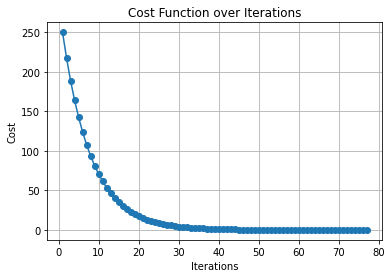

In [61]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

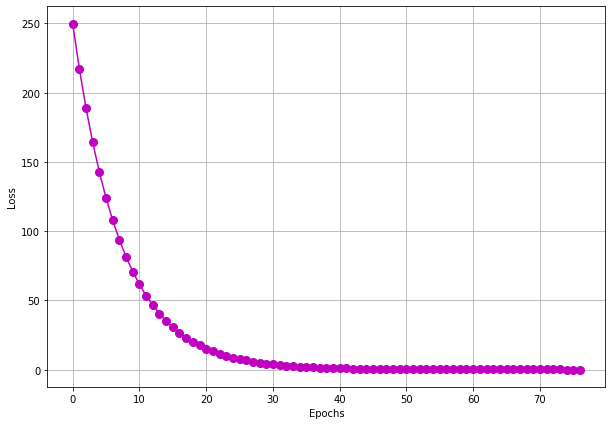

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

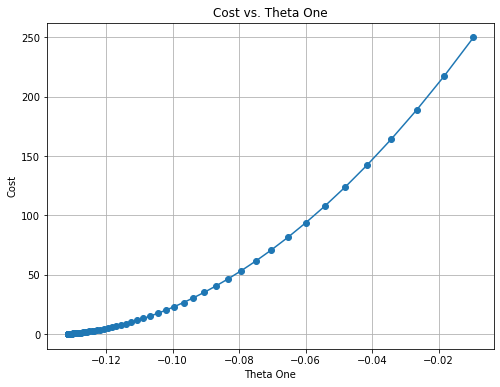

In [176]:
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

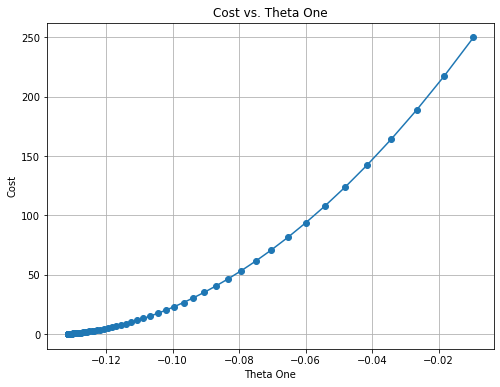

In [177]:
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

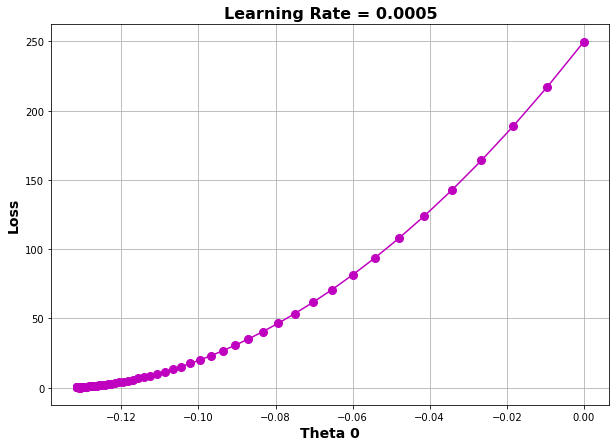

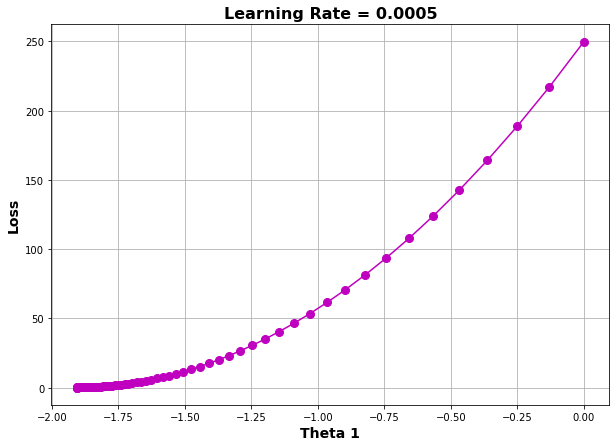

#### Plot all regression lines till converge

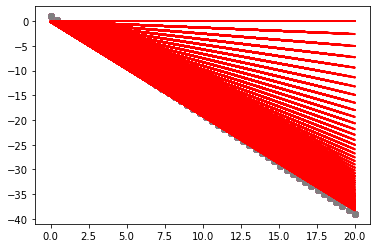

In [196]:
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)

    

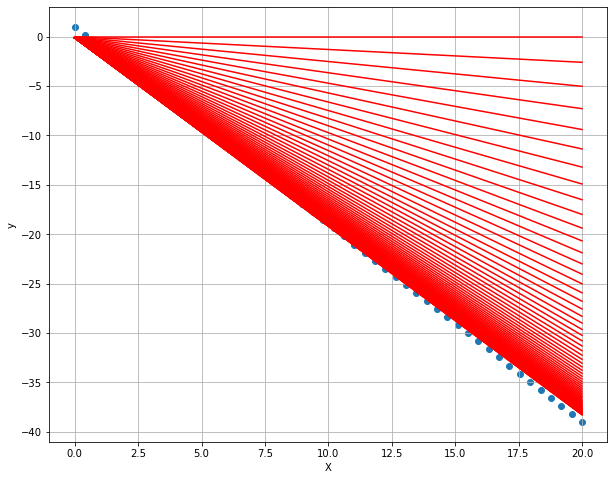

#### Plot the best regression line

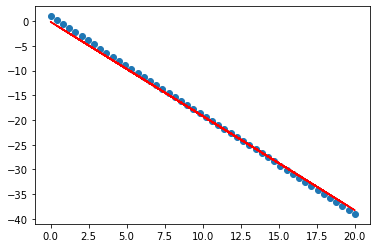

In [197]:

plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

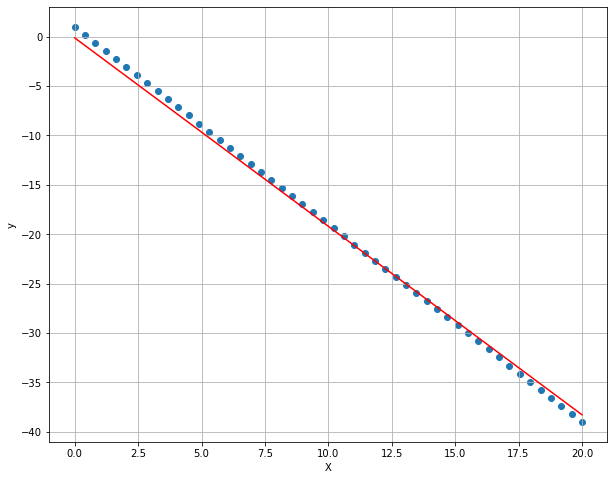

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [200]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
alpha = 0.00005 #Learning rate
iterations = 1000 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= gradient_descent(X, y, theta, alpha, iterations)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

r2_score: 0.9965793400861428


In [201]:
y_new=X@best_theta
r2_score(y_new,y)

0.9974167442257807

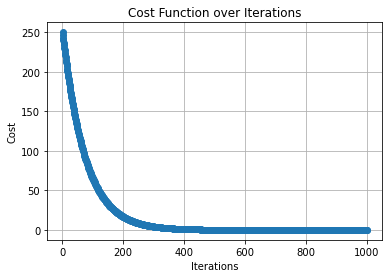

In [202]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

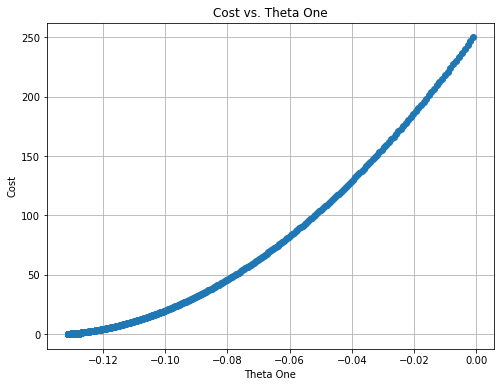

In [203]:
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

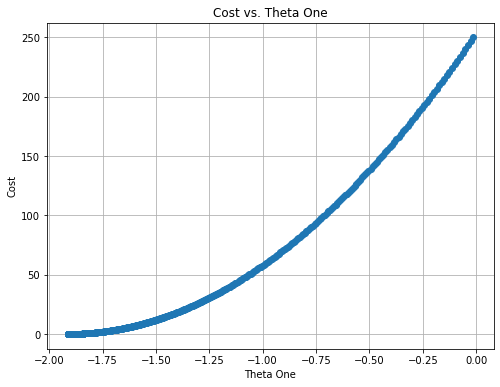

In [204]:
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

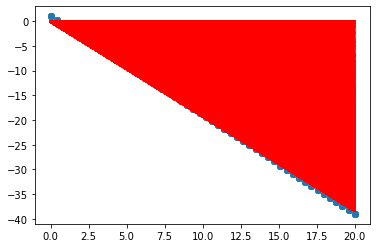

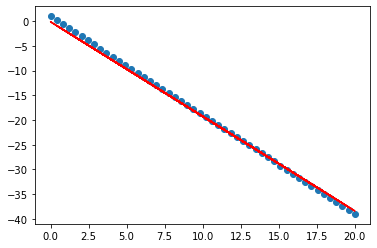

In [207]:
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

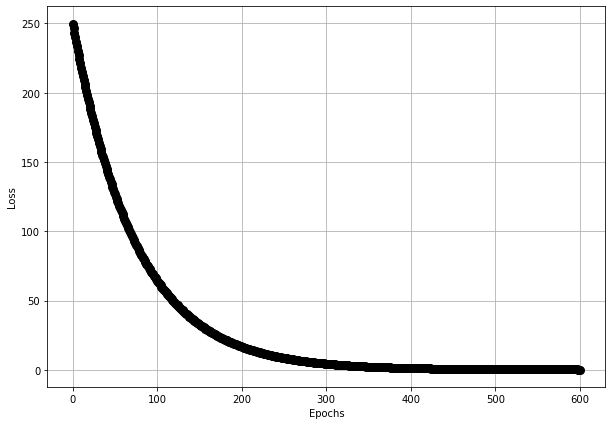

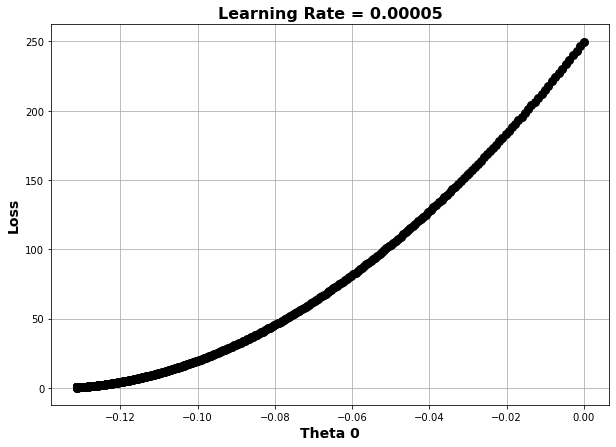

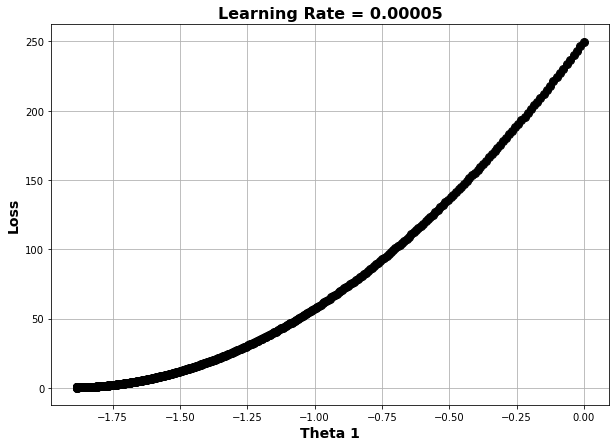

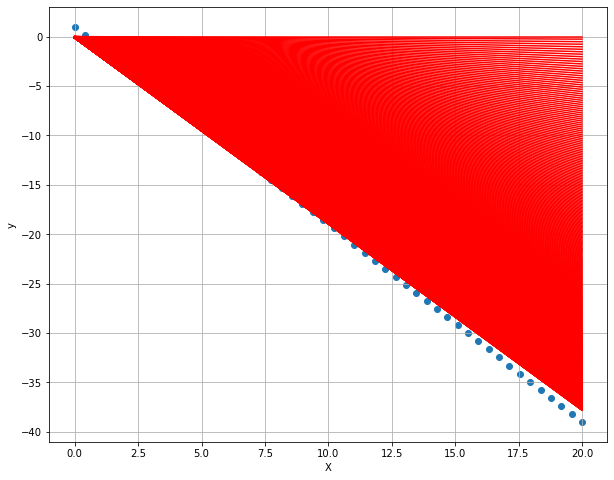

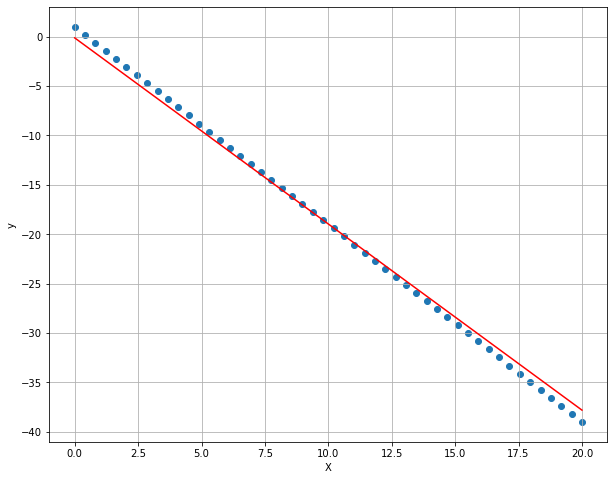

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [208]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
alpha = 0.005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= gradient_descent(X, y, theta, alpha, iterations)

In [209]:
y_new=X@best_theta
r2_score(y_new,y)

0.9988092987023302

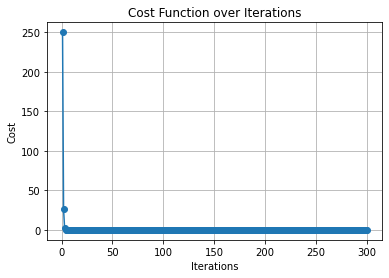

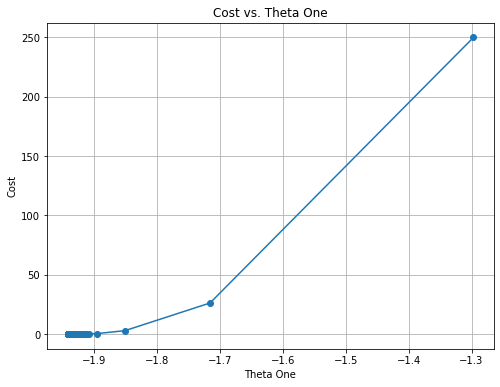

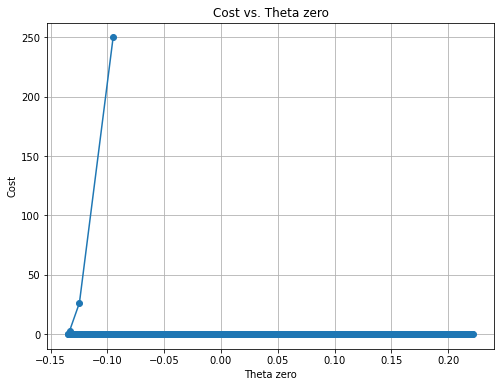

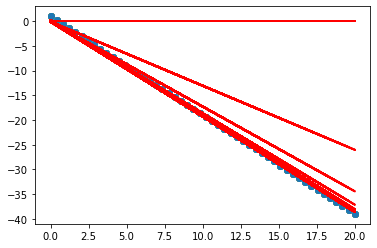

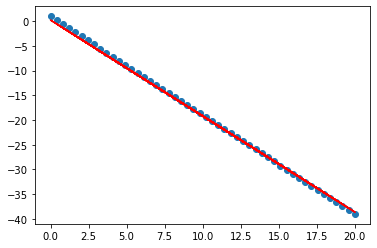

In [210]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

r2_score: 0.9976200723230484


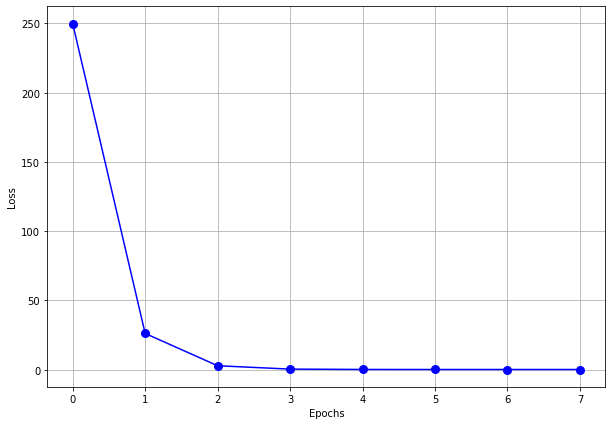

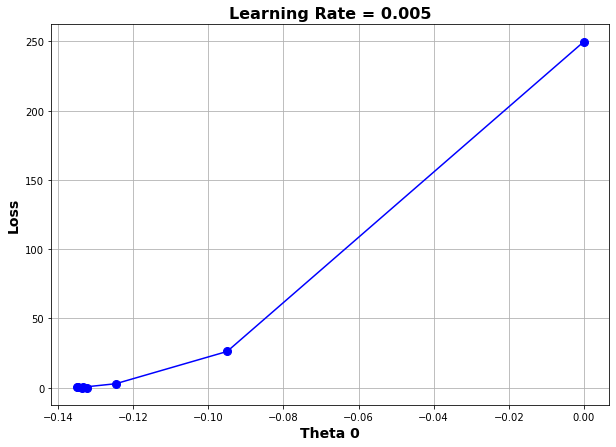

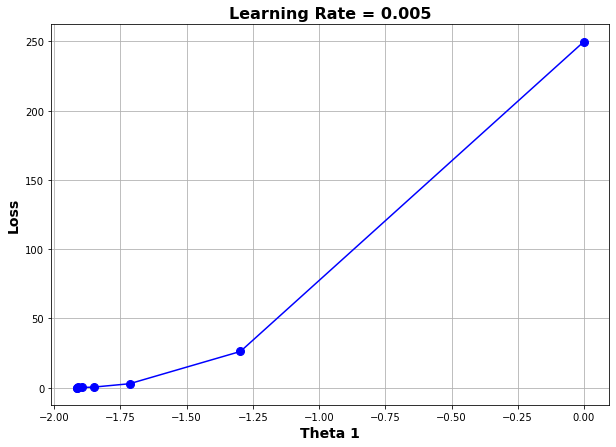

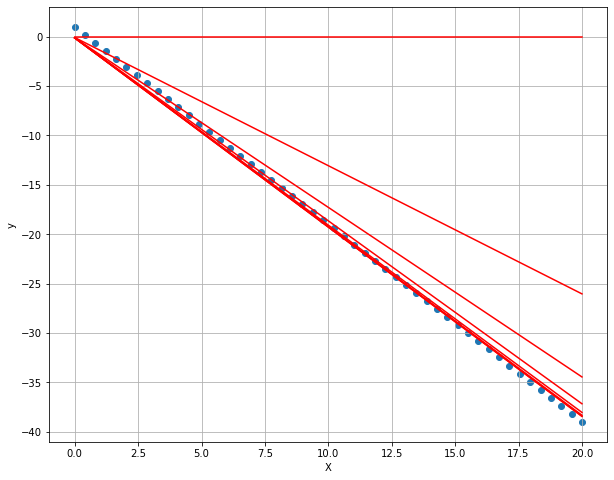

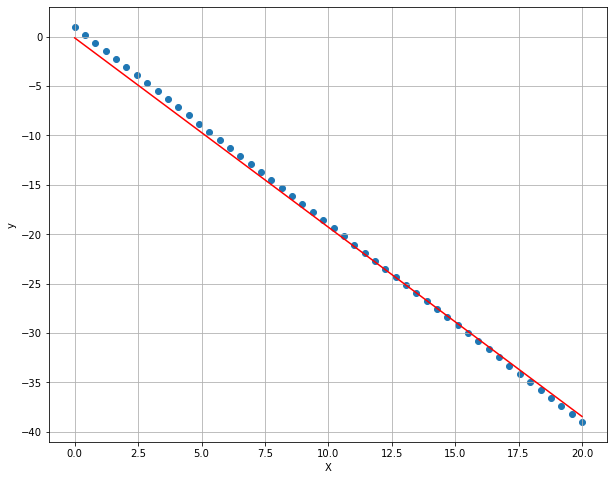

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


num_iterations = 300
theta_0=0
theta_1=0

appended_list = []
for iteration in range(num_iterations):

        print('****** iteration****',iteration)
        h_x= x*theta_1 + theta_0

        print('h_x:',h_x)
        cost = (1/(2*len(x))) * np.square(h_x - y).sum()
        appended_list.append(cost)

        gradient_theta_0 = (1/len(x)) * (h_x - y).sum()
        gradient_theta_1 = (1/len(x)) * ((h_x - y) * x).sum()
        print('theta',gradient_theta_0,gradient_theta_1)

        theta_0 -= alpha * gradient_theta_0
        theta_1 -= alpha * gradient_theta_1

        print('thetas',theta_0,theta_1)
        if(theta_0<.001).all():
            print('reach to minimum theta')
            break
        if(theta_1<.001).all():
            print('reach to minimum theta')
            break   

In [237]:

num_iterations = 3
theta_0=0
theta_1=0
alpha=.0005
m = len(y)
appended_list = []
cost=0
gradient = np.zeros((2, 1))
for iteration in range(num_iterations):
    print('thetas epoch>>>>>>>>>',theta_0,theta_1)
    print('>>>>>>>>>',cost)
    print(gradient)
    for i in range(m):
       

        print('****** iteration****',iteration,i)
        h_x= XX[i]*theta_1 + theta_0
        
        print('h_x:',h_x)
        cost = (1/2) * np.square(h_x - y[i])
        print('cost>>',cost)      
        appended_list.append(cost)

        gradient_theta_0 =  (h_x - y[i])
        gradient_theta_1 = ((h_x - y[i]) * XX[i])
        print('gradient',gradient_theta_0,gradient_theta_1)
        gradient[0,0]=gradient_theta_0
        gradient[1,0]=gradient_theta_1
        
        theta_0 -= alpha * gradient_theta_0
        theta_1 -= alpha * gradient_theta_1

        print('thetas',theta_0,theta_1)
        
         

thetas epoch>>>>>>>>> 0 0
>>>>>>>>> 0
[[0.]
 [0.]]
****** iteration**** 0 0
h_x: 0.0
cost>> 46.19762598917117
gradient 9.612244897959183 51.003748438150765
thetas -0.004806122448979592 -0.025501874219075384
****** iteration**** 0 1
h_x: -0.410754324303649
cost>> 462.8701407248482
gradient 30.425980369573903 484.3319324136254
thetas -0.020019112633766545 -0.2676678404258881
****** iteration**** 0 2
h_x: -3.297584505603825
cost>> 203.86270086886873
gradient 20.192211412763523 247.25156831955337
thetas -0.030115218340148305 -0.3912936245856648
****** iteration**** 0 3
h_x: -7.217140976036033
cost>> 406.625411745353
gradient 28.51755290151499 523.79178798701
thetas -0.0443739947909058 -0.6531895185791698
****** iteration**** 0 4
h_x: -4.576709429830044
cost>> 34.45198555593574
gradient 8.30084159057812 57.597676342786954
thetas -0.04852441558619486 -0.6819883567505634
****** iteration**** 0 5
h_x: -13.409928956005396
cost>> 306.86920860717134
gradient 24.77374451338236 485.3631578132055
th

In [348]:
def gradient_descent(X, y,  alpha, iterations):
    
    num_iterations = iterations
    theta_0=0
    theta_1=0
    alpha
    m = len(y)
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    cost=0
    gradient = np.zeros((2, 1))
    for iteration in range(num_iterations):
        print('****** iteration****',iteration)
        print('thetas epoch>>>>>>>>>',theta_0,theta_1)
        print('cost>>>>>>>>>',cost)
        print(gradient)

        for i in range(m):


           # print('****** iteration****',iteration,i)
            h_x= XX[i]*theta_1 + theta_0

           # print('h_x:',h_x)
            cost = (1/2) * np.square(h_x - y[i])
           # print('cost>>',cost)      
            cost_list.append(cost)

            gradient_theta_0 =  (h_x - y[i])
            gradient_theta_1 = ((h_x - y[i]) * XX[i])
            #print('gradient',gradient_theta_0,gradient_theta_1)
            gradient[0,0]=gradient_theta_0
            gradient[1,0]=gradient_theta_1
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            theta_0 -= alpha * gradient_theta_0
            theta_1 -= alpha * gradient_theta_1
        if np.linalg.norm(gradient)<.2:
            print('reach to smallest gradient')
            print('cost>>>>>>>>>',cost)
            print(gradient)
            break
        if cost<.1:
            print('reach to smallest cost')
            print('cost>>>>>>>>>',cost)
            print(gradient)
            break   

            #print('thetas',theta_0,theta_1)
    return cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list

In [349]:
alpha=.0005
iterations=10
cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list=gradient_descent(XX, y, alpha, iterations)

****** iteration**** 0
thetas epoch>>>>>>>>> 0 0
cost>>>>>>>>> 0
[[0.]
 [0.]]
****** iteration**** 1
thetas epoch>>>>>>>>> -0.12753385324588895 -1.864910928088219
cost>>>>>>>>> 0.6057343237552777
[[ 1.10066736]
 [17.07157545]]
reach to smallest cost
cost>>>>>>>>> 0.02238130493082408
[[0.21157176]
 [3.28152118]]


In [249]:
alpha=.0005
iterations=10
cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list=gradient_descent(XX, y, alpha, iterations)

****** iteration**** 0
thetas epoch>>>>>>>>> 0 0
>>>>>>>>> 0
[[0.]
 [0.]]
****** iteration**** 1
thetas epoch>>>>>>>>> -0.12753385324588895 -1.864910928088219
>>>>>>>>> 0.6057343237552777
[[ 1.10066736]
 [17.07157545]]
****** iteration**** 2
thetas epoch>>>>>>>>> -0.12385001858621024 -1.9155480189216496
>>>>>>>>> 0.02238130493082408
[[0.21157176]
 [3.28152118]]
****** iteration**** 3
thetas epoch>>>>>>>>> -0.11668620526405411 -1.9174308210552682
>>>>>>>>> 0.01739211788287657
[[0.18650532]
 [2.89273563]]
****** iteration**** 4
thetas epoch>>>>>>>>> -0.10947452417765854 -1.9180001857373443
>>>>>>>>> 0.017050321123588008
[[0.18466359]
 [2.86417   ]]
****** iteration**** 5
thetas epoch>>>>>>>>> -0.10230690384466336 -1.9185309058775548
>>>>>>>>> 0.016827588309449595
[[0.18345347]
 [2.8454008 ]]
****** iteration**** 6
thetas epoch>>>>>>>>> -0.09518552149161097 -1.9190572577659284
>>>>>>>>> 0.016610779691711767
[[0.18226782]
 [2.82701114]]
****** iteration**** 7
thetas epoch>>>>>>>>> -0.08811

In [211]:
XX[0]

5.3061224489795915

In [250]:
print(cost)  

0.015771437586700517


In [251]:
print(theta_0)

-0.06715709442966797


In [252]:
print(theta_1)

-1.9211287775916572


In [253]:
print(cost_list)

[46.19762598917117, 462.8701407248482, 203.86270086886873, 406.625411745353, 34.45198555593574, 306.86920860717134, 53.56906144118712, 43.676070480896634, 67.67720266995762, 17.2740759741571, 5.123426911731373, 0.055426824511310806, 71.93638199288957, 1.0428753733392442, 0.01002238970842205, 0.32411403766957886, 69.98700363340336, 66.60896959844136, 47.35901543638284, 1.5854592677743677, 0.18334827341224716, 1.8605671289260937, 5.725418690163251, 12.617460059810334, 8.155992244075385, 0.6196821684164882, 16.46325058468842, 3.1765187859345243, 4.9304751982529496, 0.13341807177187792, 2.829363410836528, 0.010350924559554844, 4.530122432401982, 0.5153541234996624, 0.605716490359779, 0.41704199485405097, 5.615060048045432, 2.1995745491649883, 0.36283451825073554, 2.52226614163992, 0.0637954328474322, 0.16280394111448884, 0.029595235751505748, 3.33232048380196, 0.015463312995303494, 0.22624970447957665, 1.3003182473178037, 0.04290764182789522, 0.15162515267986992, 0.6057343237552777, 0.0843

In [254]:
print(theta_0_list)

[0, -0.004806122448979592, -0.020019112633766545, -0.030115218340148305, -0.0443739947909058, -0.04852441558619486, -0.06091128784288604, -0.06608666519343678, -0.0707597835570617, -0.07657687916698412, -0.07951576296650369, -0.08111629833189418, -0.08128277179000584, -0.08728012045391098, -0.08800222687727918, -0.08793143708384672, -0.0883340001457821, -0.09424953070666181, -0.1000205345014293, -0.10488669394376074, -0.10577704760039791, -0.10607982497192049, -0.10704433705813976, -0.1087362913557145, -0.11124800989685424, -0.11326741478989517, -0.11271078108250022, -0.1155798619967207, -0.11684012363343241, -0.11841023114539663, -0.11815195022104112, -0.11934135414966178, -0.11941329483550628, -0.12091830686741864, -0.12041068785501875, -0.12096101343608862, -0.12050437244206046, -0.12217994100944966, -0.12322864843985268, -0.12365457948958417, -0.1247775813020582, -0.12459898198396399, -0.12488429228969662, -0.12500593774943825, -0.1262967360458041, -0.1263846658842985, -0.126048325

In [255]:
print(theta_1_list)

[0, -0.025501874219075384, -0.2676678404258881, -0.3912936245856648, -0.6531895185791698, -0.6819883567505634, -0.9246699356571662, -0.9795923075405617, -1.0272771888020404, -1.1032555804418436, -1.1260469241932198, -1.1338862810849284, -1.134158074485927, -1.224730278797964, -1.2270881773232478, -1.2270014959435347, -1.2279873646666417, -1.3269819577262612, -1.4353354983627118, -1.5286863121543761, -1.5341374569909303, -1.5352497003965235, -1.5415485548371393, -1.5581228010174633, -1.5929793032210353, -1.6185309569697166, -1.6185309569697166, -1.6700573080822476, -1.6839459057113153, -1.70509429260716, -1.7045671886799039, -1.7186458474268422, -1.7189688464245114, -1.7410833089342441, -1.7408761175006116, -1.745593193909782, -1.7452204257513917, -1.7746283638729166, -1.7896098985929596, -1.793608434978194, -1.8119431584471577, -1.8112141816386098, -1.8137761517309028, -1.8146698734759434, -1.8404858394032604, -1.8412036340032147, -1.8402426614845915, -1.854065366394791, -1.85322838794

##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 0.37828093829974396

Gradient Vector:
[[-0.86980565]
 [-1.77511358]]

Gradient Vector Norm:
1.9767625301666

theta_0_new : -0.13516909716690004
theta_1_new : -1.869971913093026

****************** Epoch 1 ********************

Cost = 0.4705021363396433

Gradient Vector:
[[-0.97005375]
 [-1.97970153]]

Gradient Vector Norm:
2.2045912095645743

theta_0_new : -0.13169704743062774
theta_1_new : -1.9207947829431942

****************** Epoch 2 ********************

Cost = 0.4672003879494755

Gradient Vector:
[[-0.96664408]
 [-1.97274302]]

Gradient Vector Norm:
2.196842232437341

theta_0_new : -0.12450421548406185
theta_1_new : -1.9226485332326042

****************** Epoch 3 ********************

Cost = 0.4612690180123547

Gradient Vector:
[[-0.96048844]
 [-1.96018048]]

Gradient Vector Norm:
2.1828526193936026

theta_0_new : -0.11725717626212058
theta_1_new : -1.923183317357008

****************** Epoch 4 ********************

Cost = 0

r2_score: 0.9976768960178554


In [263]:
h=theta_0+theta_1*XX

In [264]:
h=theta_0+theta_1*XX
r2_score(y,h)

0.9978861493711174

In [258]:
h=theta_0+theta_1*XX
h

array([-10.26090163, -30.6483907 , -23.59118294, -35.35319587,
       -13.39743841, -37.70559845, -20.45464616, -19.67051197,
       -25.15945133, -14.9657068 ,  -9.47676743,  -3.20369387,
       -29.08012231,  -6.34023065,  -2.41955968,  -4.77196226,
       -32.21665909, -36.13733006, -36.92146426, -11.82917002,
        -7.12436485, -12.61330421, -18.88637777, -26.72771972,
       -24.37531714,  -0.06715709, -34.56906167, -21.23878036,
       -25.94358553,  -3.98782807, -22.80704875,  -8.69263324,
       -28.29598811,  -0.85129129, -16.53397519,  -1.63542548,
       -33.78492748, -27.51185392, -18.10224358, -31.43252489,
        -7.90849904, -17.31810938, -14.1815726 , -38.48973265,
       -15.74984099,  -5.55609646, -33.00079328, -11.04503582,
       -22.02291455, -29.8642565 ])

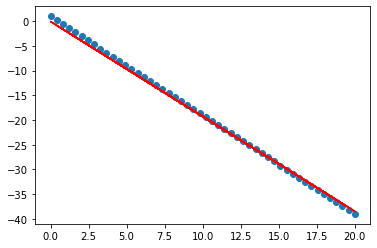

In [259]:
plt.scatter(XX, y)
plt.plot(XX, h,color='red')
plt.show()

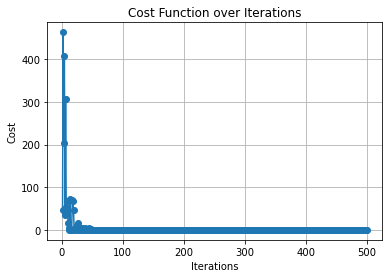

In [260]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

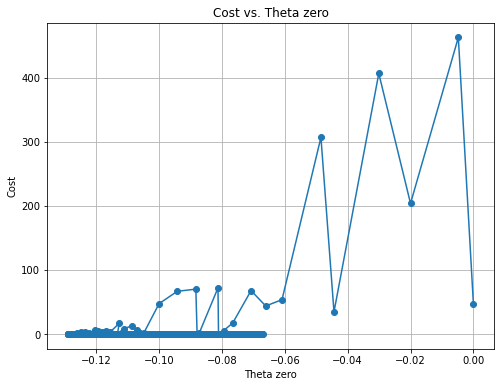

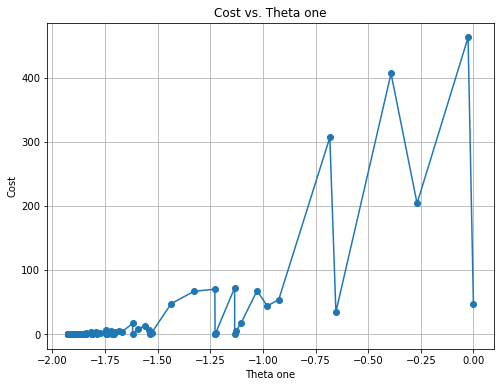

In [262]:
plt.figure(figsize=(8, 6))
plt.plot(theta_0_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta one')
plt.xlabel('Theta one')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

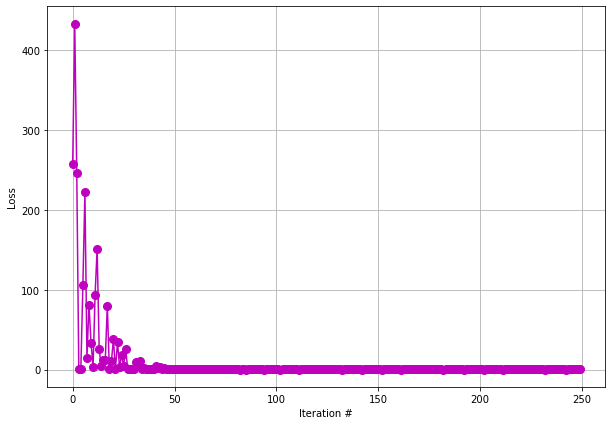

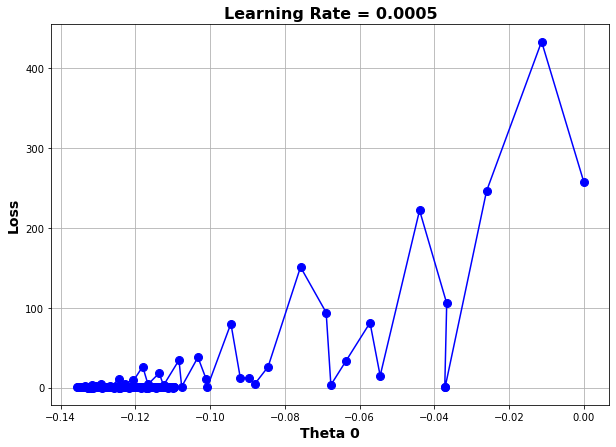

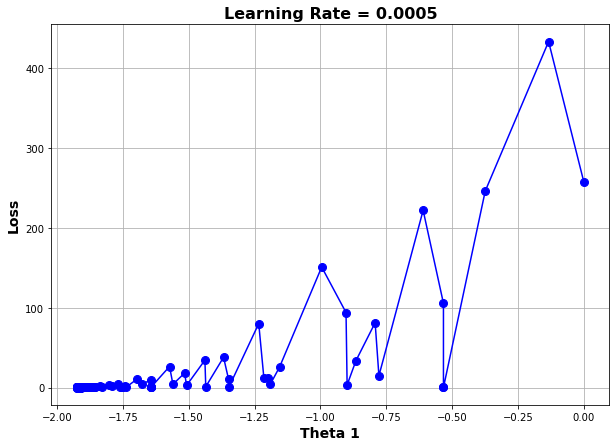

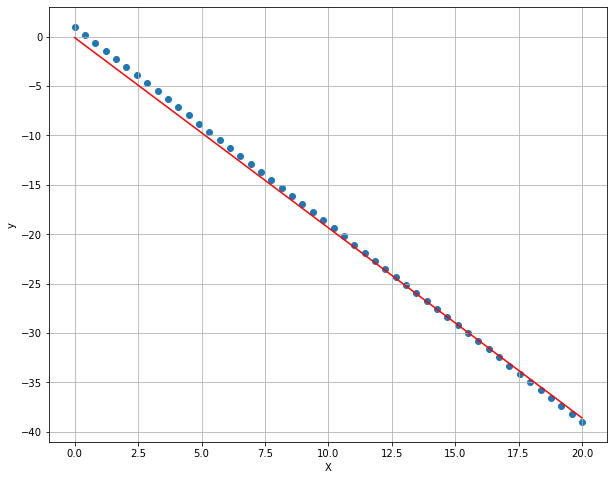

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [270]:
alpha=.0001
iterations=300
cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list=gradient_descent(XX, y, alpha, iterations)

****** iteration**** 0
thetas epoch>>>>>>>>> 0 0
cost>>>>>>>>> 0
[[0.]
 [0.]]
****** iteration**** 1
thetas epoch>>>>>>>>> -0.06887406422672956 -0.9504438617999833
cost>>>>>>>>> 121.46906548691264
[[ 15.58647269]
 [241.74937236]]
****** iteration**** 2
thetas epoch>>>>>>>>> -0.10284450987285872 -1.4292892201868765
cost>>>>>>>>> 31.5283087845174
[[  7.9408197 ]
 [123.16373418]]
****** iteration**** 3
thetas epoch>>>>>>>>> -0.11923299361908357 -1.6705641313013402
cost>>>>>>>>> 8.360635454425607
[[ 4.08916506]
 [63.42378464]]
****** iteration**** 4
thetas epoch>>>>>>>>> -0.12676539549372723 -1.7921615345932023
cost>>>>>>>>> 2.3085813499017505
[[ 2.14875841]
 [33.32768144]]
****** iteration**** 5
thetas epoch>>>>>>>>> -0.12983742506610246 -1.8534706563442107
cost>>>>>>>>> 0.6858005435839635
[[ 1.17115374]
 [18.16483355]]
****** iteration**** 6
thetas epoch>>>>>>>>> -0.13066344437220986 -1.8844091508259748
cost>>>>>>>>> 0.2302259728081964
[[ 0.6785661 ]
 [10.52469862]]
****** iteration**** 

 [2.19469403]]
****** iteration**** 189
thetas epoch>>>>>>>>> 0.10430369861246969 -1.9333599395229673
cost>>>>>>>>> 0.009985447228361564
[[0.14131842]
 [2.19187746]]
****** iteration**** 190
thetas epoch>>>>>>>>> 0.10545319645149319 -1.9334454624902864
cost>>>>>>>>> 0.00995983389346435
[[0.14113705]
 [2.1890645 ]]
****** iteration**** 191
thetas epoch>>>>>>>>> 0.10660121907477682 -1.9335308757011325
cost>>>>>>>>> 0.009934286258472733
[[0.14095592]
 [2.18625515]]
****** iteration**** 192
thetas epoch>>>>>>>>> 0.10774776837554868 -1.9336161792963633
cost>>>>>>>>> 0.009908804154860429
[[0.14077503]
 [2.1834494 ]]
****** iteration**** 193
thetas epoch>>>>>>>>> 0.10889284624460689 -1.9337013734166555
cost>>>>>>>>> 0.009883387414533486
[[0.14059436]
 [2.18064726]]
****** iteration**** 194
thetas epoch>>>>>>>>> 0.11003645457032338 -1.9337864582025024
cost>>>>>>>>> 0.009858035869834737
[[0.14041393]
 [2.17784871]]
****** iteration**** 195
thetas epoch>>>>>>>>> 0.11117859523864634 -1.9338714337

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [268]:
h=theta_0+theta_1*XX
r2_score(y,h)

0.9988802858663781

r2_score =  0.9976210193556192


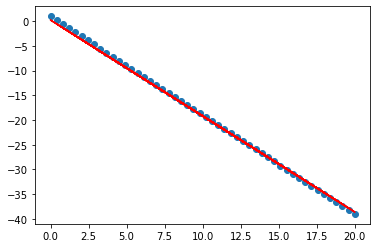

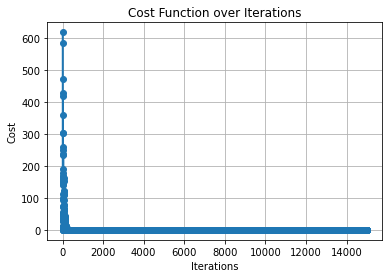

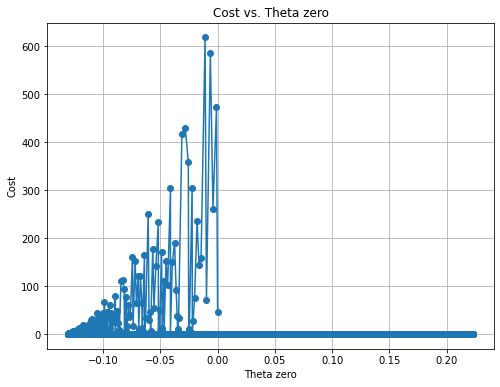

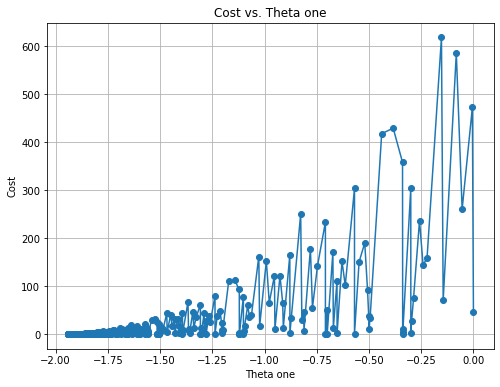

In [271]:
plt.scatter(XX, y)
plt.plot(XX, h,color='red')
plt.show()
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta one')
plt.xlabel('Theta one')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

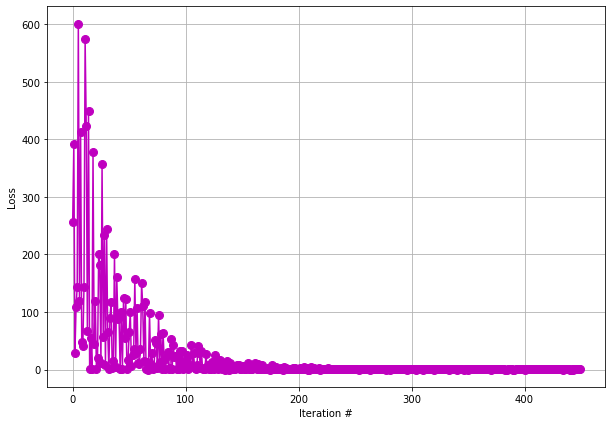

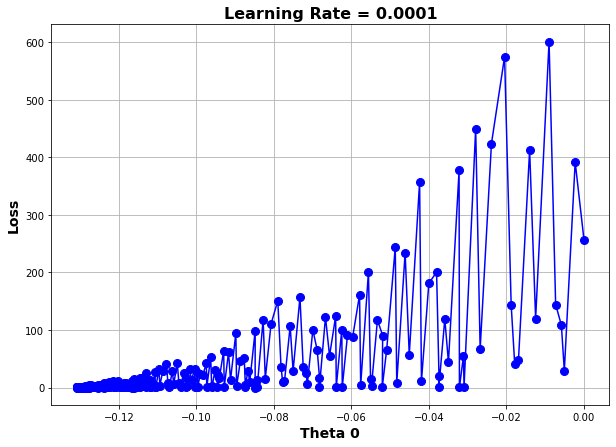

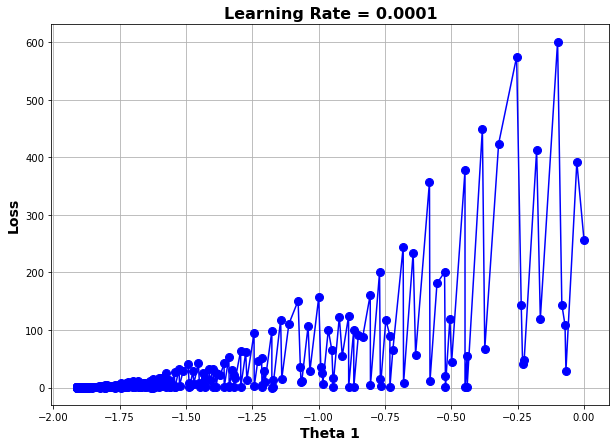

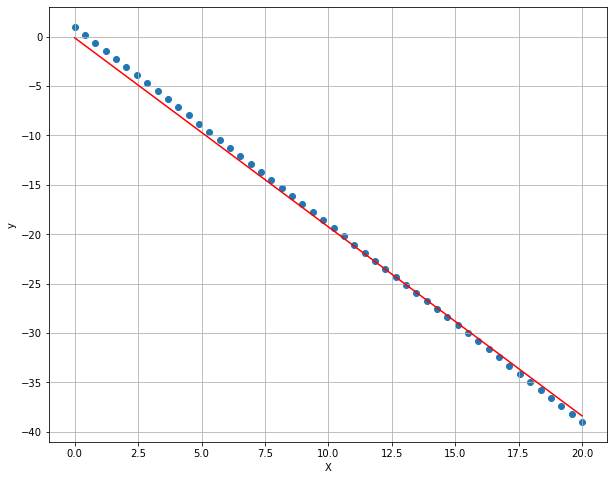

In [277]:
alpha=.00007
iterations=300
cost,theta_0,theta_1,cost_list,theta_0_list,theta_1_list=gradient_descent(XX, y, alpha, iterations)

****** iteration**** 0
thetas epoch>>>>>>>>> 0 0
cost>>>>>>>>> 0
[[0.]
 [0.]]
****** iteration**** 1
thetas epoch>>>>>>>>> -0.052931530335797256 -0.7279382326669247
cost>>>>>>>>> 180.4669418118103
[[ 18.99826002]
 [294.66689004]]
****** iteration**** 2
thetas epoch>>>>>>>>> -0.08535623130548851 -1.1792327204685726
cost>>>>>>>>> 70.15450159572595
[[ 11.84521014]
 [183.72162662]]
****** iteration**** 3
thetas epoch>>>>>>>>> -0.10506862865907968 -1.4590293960744196
cost>>>>>>>>> 27.46005276567093
[[  7.41081005]
 [114.94317622]]
****** iteration**** 4
thetas epoch>>>>>>>>> -0.1169007269111523 -1.632510628595342
cost>>>>>>>>> 10.866018095744394
[[ 4.66176321]
 [72.30489871]]
****** iteration**** 5
thetas epoch>>>>>>>>> -0.12384799588906832 -1.7400844598449188
cost>>>>>>>>> 4.373419268563169
[[ 2.95750546]
 [45.87151323]]
****** iteration**** 6
thetas epoch>>>>>>>>> -0.1277673955534197 -1.8068007593822974
cost>>>>>>>>> 1.8067796454425824
[[ 1.90093642]
 [29.48391189]]
****** iteration**** 7

thetas epoch>>>>>>>>> 0.038932969397100975 -1.928496236752399
cost>>>>>>>>> 0.011327548878444265
[[0.1505161]
 [2.3345355]]
****** iteration**** 193
thetas epoch>>>>>>>>> 0.03979583853171658 -1.9285604345537497
cost>>>>>>>>> 0.011307217716861946
[[0.15038097]
 [2.3324395 ]]
****** iteration**** 194
thetas epoch>>>>>>>>> 0.04065793296163442 -1.9286245747167674
cost>>>>>>>>> 0.011286923046504166
[[0.15024595]
 [2.33034538]]
****** iteration**** 195
thetas epoch>>>>>>>>> 0.04151925338240304 -1.9286886572932016
cost>>>>>>>>> 0.01126666480187479
[[0.15011106]
 [2.32825314]]
****** iteration**** 196
thetas epoch>>>>>>>>> 0.04237980048894652 -1.928752682334755
cost>>>>>>>>> 0.011246442917595488
[[0.14997628]
 [2.32616278]]
****** iteration**** 197
thetas epoch>>>>>>>>> 0.043239574975565 -1.9288166498930832
cost>>>>>>>>> 0.011226257328406077
[[0.14984163]
 [2.32407429]]
****** iteration**** 198
thetas epoch>>>>>>>>> 0.04409857753593523 -1.9288805600197962
cost>>>>>>>>> 0.011206107969161643
[[0

##### The following results uses alpha = 0.00007 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [278]:
h=theta_0+theta_1*XX
r2_score(y,h)

0.9985879677481089

r2_score =  0.997655146572521


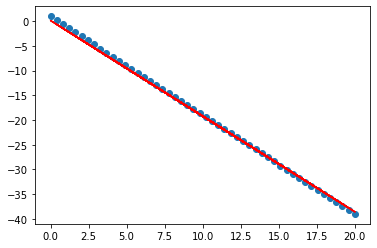

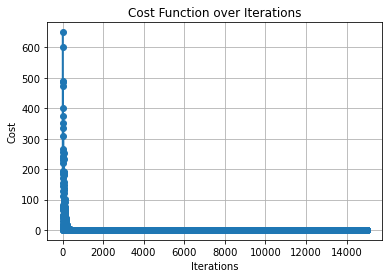

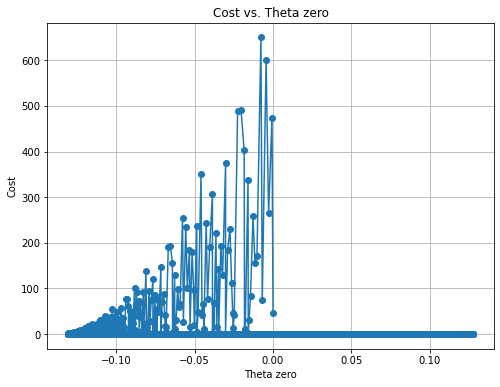

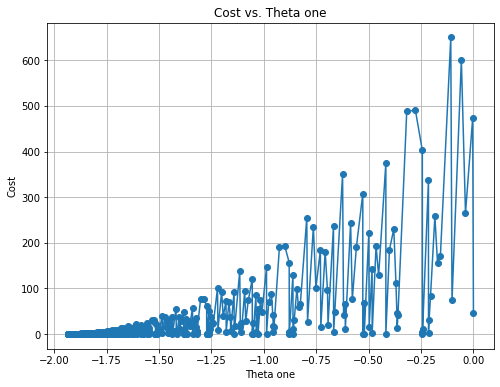

In [279]:
plt.scatter(XX, y)
plt.plot(XX, h,color='red')
plt.show()
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1_list, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta one')
plt.xlabel('Theta one')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

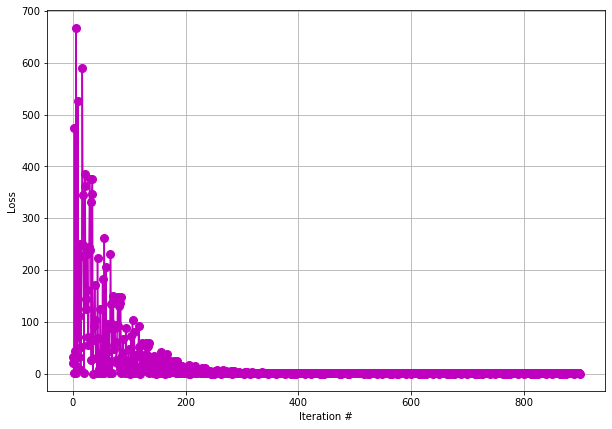

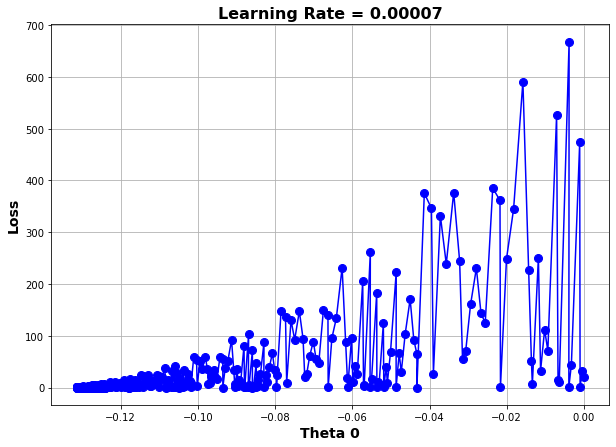

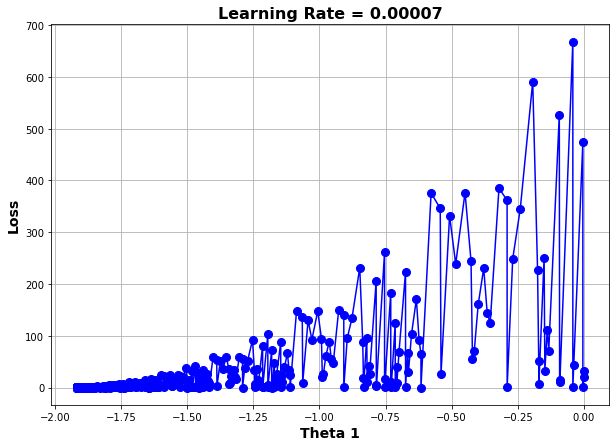

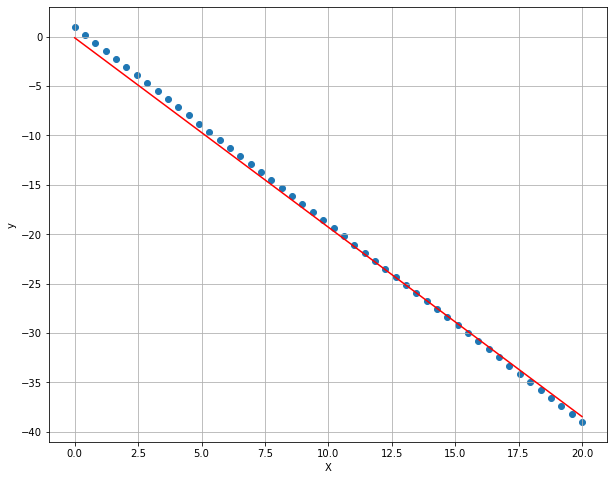

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    cost_list = []
    cost_list_batch = []
    theta_0 = []
    theta_1 = []
    theta_0_batch = []
    theta_1_batch = []
    hx=[]
    gradient = np.zeros((2, 1))
   # cost=0
    num_batches = int(m/batch_size)
    for _ in range(iterations):
        
        for i in range(num_batches):
            start_index = i * batch_size
            end_index = min((i + 1) * batch_size, m)
            X_batch = X[start_index:end_index]
            y_batch = y[start_index:end_index]
            error=theta.T.dot(X_batch.T) - y_batch
            #error = X_batch.dot(theta) - y_batch
            cost=1/(batch_size*2)*(error.dot(error.T))
            #cost = 1 / (2 * batch_size) * (error.dot(error))
            gradient = (1 /batch_size ) * X_batch.T.dot(error.T)
            ypredict=X@theta
            hx.append(ypredict)
           # gradient = (1 / batch_size) * X_batch.T.dot(error)
            
            cost_list.append(cost[0,0])
            theta -= alpha * gradient
            theta_0.append(theta[0,0])
            theta_1.append(theta[1,0])
        theta_0_batch.append(theta[0,0])
        theta_1_batch.append(theta[1,0])   
        cost_list_batch.append(cost[0,0])
        if np.linalg.norm(gradient) < 0.2:
            print('small gradient')
            break
        if cost<.1:
            print('small cost')
            break
    
    return cost_list,error,theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch

In [49]:
def mini_batch_gradient_descent_upgrade(X, y,alpha, iterations, batch_size):
    X=np.c_[np.ones((X.shape[0], 1)), X]
    y=y.reshape(y.shape[0], 1)
    # m = len(y)
    theta = np.zeros((X.shape[1], 1))
    m= y.shape[0]
    cost_list = []
    cost_list_batch = []
    theta_0 = []
    theta_1 = []
    theta_0_batch = []
    theta_1_batch = []
    hx=[]
    gradient = np.zeros((X.shape[1], 1))
   # cost=0
    num_batches = int(m/batch_size)
    for j in range(iterations):
        
        for i in range(num_batches):
            start_index = i * batch_size
            end_index = min((i + 1) * batch_size, m)
            X_batch = X[start_index:end_index]
            y_batch = y[start_index:end_index]
            h_x = np.dot(X_batch, theta)
            error= h_x - y_batch
           # error=theta.T.dot(X_batch.T) - y_batch
            #error = X_batch.dot(theta) - y_batch
            cost=np.mean(error**2)/2
           # cost=1/(batch_size*2)*(error**2)
            
            gradient = (1 /batch_size ) * X_batch.T.dot(error)
            ypredict=X@theta
            hx.append(ypredict)
           # gradient = (1 / batch_size) * X_batch.T.dot(error)
            
            cost_list.append(cost)
             
            theta -= alpha * gradient
            theta_0.append(theta[0,0])
            theta_1.append(theta[1,0])
        theta_0_batch.append(theta[0,0])
        theta_1_batch.append(theta[1,0])   
        cost_list_batch.append(cost)
        if np.linalg.norm(gradient) < 0.001:
            print('reach to small gradient')
            break
        if j !=0 and abs(cost_list_batch[-1]-cost_list_batch[-2])<.001:
            print('reach to small cost')
            break         
       # if np.linalg.norm(gradient) < 0.2:
          #  print('small gradient')
          #  break
       # if cost<.1:
          #  print('small cost')
           # break
    
    return cost_list,error,theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_list = []
    
    theta_0 = []
    theta_1 = []
    hx=[]
    for _ in range(iterations):
       # error = X.dot(theta) - y
        error=theta.T.dot(X.T) - y
        cost=1/(m*2)*(error.dot(error.T))
        gradient = (1 / m) * X.T.dot(error.T)
        ypredict=X@theta
        hx.append(ypredict)
        cost_list.append(cost[0,0])

        theta -= alpha * gradient
        theta_0.append(theta[0,0])
        theta_1.append(theta[1,0])
       
        if np.linalg.norm(gradient) < 0.0001:
            break
        
    return cost_list,error,theta,gradient,theta_0,theta_1,hx

In [360]:
10/3

3.3333333333333335

In [50]:
#um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
#theta = np.zeros((um_columns, 1))
#theta
batch_size=5
alpha = 0.0005 #Learning rate
iterations = 80 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch= mini_batch_gradient_descent_upgrade(X, y, alpha, iterations,batch_size)


reach to small cost
0.13648594649754237


In [53]:
print(len(theta_0_batch))

10


In [54]:
print(len(theta_0))

100


In [41]:
print(theta_0_batch)

[-0.07024581326687265, -0.10425432757566, -0.12033926663266409, -0.12755938213199233, -0.13039551982454817, -0.1310640969151577, -0.13066144716868097, -0.1297298630608912, -0.12877901542109552, -0.12746437347647252, -0.12608432908406791, -0.12467286959191426, -0.12324680539959719, -0.12181445045311347, -0.1203799159897838, -0.11894523440856994, -0.1175114098273882, -0.1160789377337951, -0.11464806202649351, -0.11321890215907959, -0.11179151603078943, -0.11036593109495628, -0.10894215974658558, -0.10752020693370712, -0.10610007392227436, -0.10468176015844291, -0.10326526418973156, -0.10185058412066593, -0.10043771783815748, -0.09902666312298372, -0.09761741770492913, -0.09620997929005826, -0.09480434557420434, -0.0934005142496393, -0.09199848300837116, -0.09059824954377325, -0.08919981155138797, -0.0878031667293226, -0.08640831277844313, -0.08501524740246817, -0.08362396830801361, -0.08223447320461272, -0.0808467598047242, -0.07946082582373426, -0.0780766689799558, -0.076694286994626, -

In [42]:
print(cost_list_batch)

[74.29116816731101, 18.270959395323963, 4.569703535900375, 1.219876827024026, 0.4013599884305778, 0.20149610739362034, 0.15266017360899986, 0.14060943770662654, 0.15067842475231863, 0.13656590462219664, 0.13606426798506302, 0.13568861190658718, 0.13533928602682477, 0.1349945219934027, 0.13465028381107783, 0.1343062204400436, 0.13396255953868522, 0.13361951084043877, 0.13327720089297426, 0.1329356969650784, 0.13259503259425928, 0.13225522356861935, 0.1319162766444157, 0.1315781940538103, 0.1312409757809654, 0.13090462069849046, 0.13056912713179272, 0.1302344931385941, 0.12990071664717195, 0.12956779552469816, 0.1292357276109966, 0.1289045107352147, 0.1285741427240561, 0.12824462140583695, 0.12791594461248562, 0.12758811018051996, 0.12726111595152648, 0.12693495977238972, 0.12660963949539175, 0.12628515297826484, 0.12596149808420315, 0.1256386726818611, 0.12531667464535012, 0.12499550185422681, 0.12467515219347987, 0.12435562355351723, 0.12403691383015511, 0.12371902092459972, 0.12340194

In [352]:
print(cost_list)

[303.78696376509794, 259.90711161790034, 68.19218049967859, 264.32276159931126, 97.79602008036579, 113.74498412775347, 69.1937275998877, 126.17961833180914, 73.33775587301852, 74.29116816731101, 74.62333448213148, 63.687352348858056, 16.338895804653294, 66.13486565356673, 23.247600937234207, 28.178522200844903, 16.5972615960856, 31.420967050263858, 17.884002084994627, 18.270959395323963, 18.442473891582683, 15.65392177613269, 3.9549287795345442, 16.97194335344228, 5.395858853988772, 7.158599274687808, 3.9726919466216337, 8.01405664325094, 4.405124401308958, 4.569703535900376, 4.641663694352749, 3.889571771789696, 1.0743089064947147, 4.611036323259535, 1.2196754477215355, 1.9737694753740862, 1.0043052526707326, 2.1771592240768665, 1.1510812793060938, 1.2198768270240257, 1.2377535130411017, 1.0052116964394187, 0.44297305477627946, 1.4224209114458473, 0.29243690708793013, 0.684278419533418, 0.33735240054631516, 0.6946074069019825, 0.3764236699618448, 0.40135998843057785, 0.391356689135210

In [300]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
batch_size=5
alpha = 0.0005 #Learning rate
iterations = 77 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx= mini_batch_gradient_descent(X, y, theta, alpha, iterations,batch_size)


In [301]:
print(cost_list)

[array([[303.78696377]]), array([[259.90711162]]), array([[68.1921805]]), array([[264.3227616]]), array([[97.79602008]]), array([[113.74498413]]), array([[69.1937276]]), array([[126.17961833]]), array([[73.33775587]]), array([[74.29116817]]), array([[74.62333448]]), array([[63.68735235]]), array([[16.3388958]]), array([[66.13486565]]), array([[23.24760094]]), array([[28.1785222]]), array([[16.5972616]]), array([[31.42096705]]), array([[17.88400208]]), array([[18.2709594]]), array([[18.44247389]]), array([[15.65392178]]), array([[3.95492878]]), array([[16.97194335]]), array([[5.39585885]]), array([[7.15859927]]), array([[3.97269195]]), array([[8.01405664]]), array([[4.4051244]]), array([[4.56970354]]), array([[4.64166369]]), array([[3.88957177]]), array([[1.07430891]]), array([[4.61103632]]), array([[1.21967545]]), array([[1.97376948]]), array([[1.00430525]]), array([[2.17715922]]), array([[1.15108128]]), array([[1.21987683]]), array([[1.23775351]]), array([[1.0052117]]), array([[0.4429

In [302]:
print(theta_0)

[-0.011255102040816327, -0.02202995796181863, -0.025948007632477166, -0.03589228307211764, -0.04229267200562761, -0.04807395610434905, -0.052878132571795626, -0.059801282716920645, -0.06496276693725977, -0.07024581326687265, -0.07577716479461129, -0.0810807554398867, -0.08284258948466942, -0.08774627879288203, -0.09082094690679106, -0.09358323876844234, -0.09584252885521527, -0.09923054827777353, -0.10170323465661807, -0.10425432757566, -0.10695451274494855, -0.10955181450227112, -0.11024731779235805, -0.11265773655465142, -0.11408747756018049, -0.11535657129442267, -0.11635720157480729, -0.11799664054167197, -0.1191394353322135, -0.12033926663266409, -0.12163908152083028, -0.12289777021122229, -0.12306604624071708, -0.12424320593154886, -0.12485941230876033, -0.12539003093734494, -0.12576822402677787, -0.12654278683458278, -0.12702786319770487, -0.12755938213199233, -0.12816655976230687, -0.12876314644019687, -0.1286708586208755, -0.12923801491094372, -0.12945192887486354, -0.12961739

In [303]:
print(gradient)

[[-0.22360126]
 [-0.02266983]]


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [304]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)

0.9978513986340704

r2_score 0.9974493632266231


plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

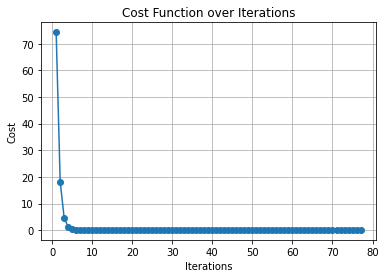

In [372]:
plt.plot(range(1, len(cost_list_batch) + 1), cost_list_batch, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

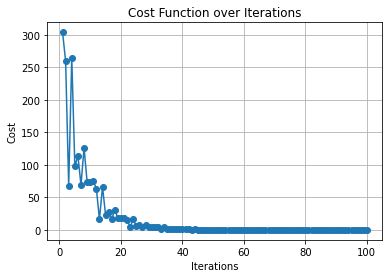

In [56]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

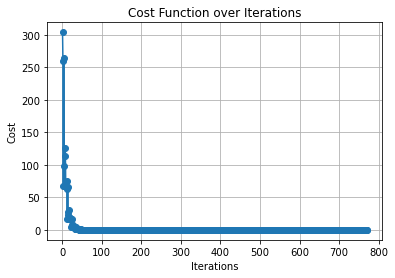

In [363]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

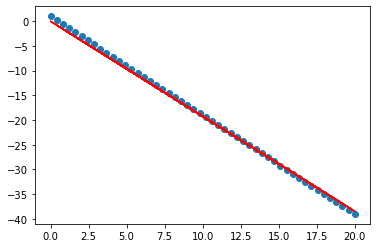

In [374]:
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

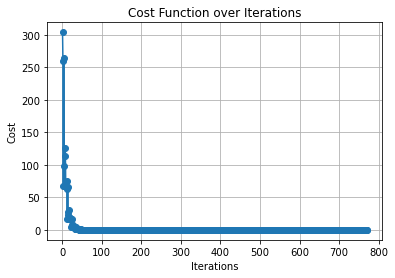

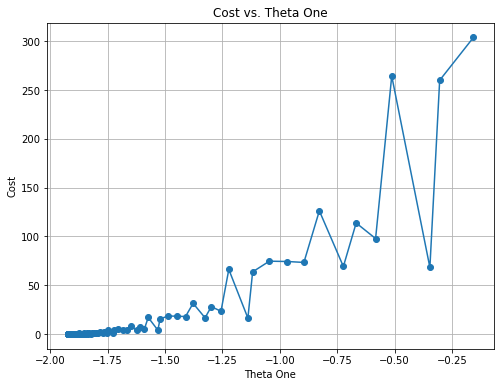

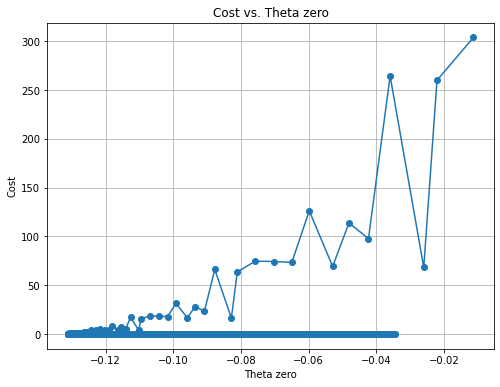

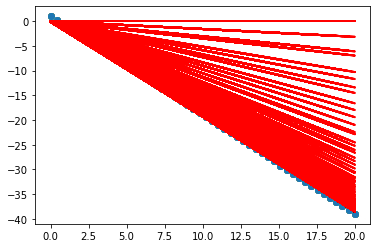

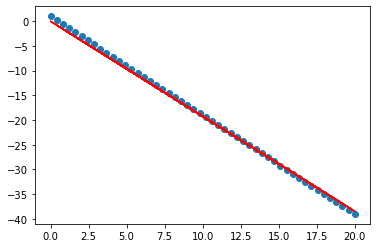

In [375]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

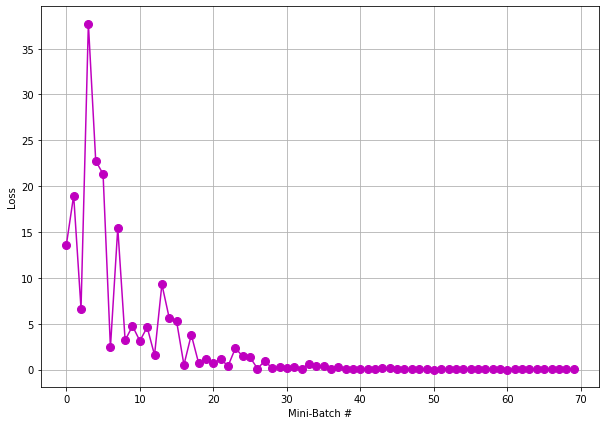

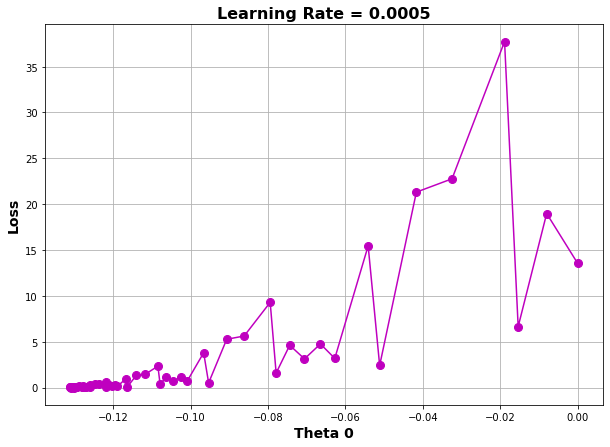

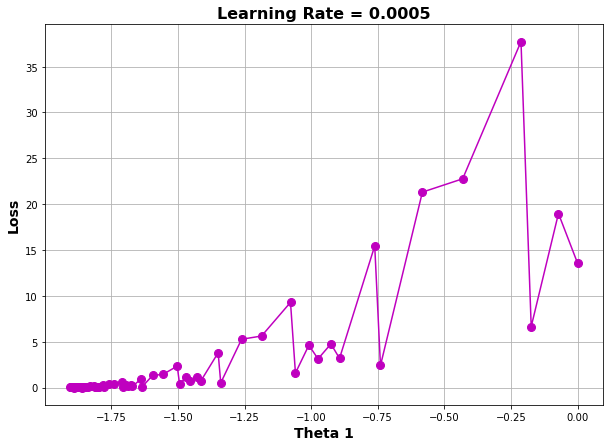

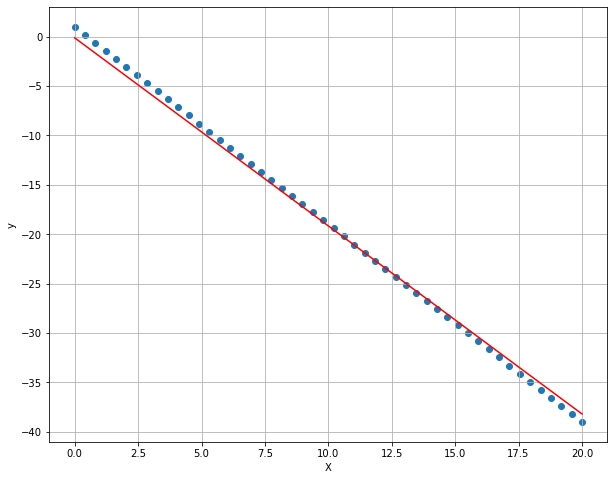

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [381]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
batch_size=5
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch= mini_batch_gradient_descent(X, y, theta, alpha, iterations,batch_size)


small cost


In [382]:
print(cost_list_batch)

[74.29116816731101, 18.270959395323963, 4.569703535900376, 1.2198768270240257, 0.40135998843057785, 0.2014961073936203, 0.15266017360899986, 0.14060943770662657, 0.13747681489269323, 0.1364859464975424, 0.1359995605115712, 0.13562729321712116, 0.13527868664166265, 0.1349341036107453, 0.1345899713058047, 0.13424602323167054, 0.13390249351446623, 0.13355958644670204, 0.1332174237755778, 0.1328760698819, 0.1325355567504936, 0.13219589937198237, 0.13185710410159432, 0.13151917297203353, 0.1311821058689795, 0.13084590161677842, 0.13051055851747595, 0.13017607461773983, 0.1298424478408879, 0.12950967605213842, 0.12917775709084625, 0.1288466887864221, 0.12851646896619365, 0.1281870954592775, 0.12785856609848834, 0.12753087872127392, 0.1272040311701677, 0.12687802129300801, 0.12655284694303678, 0.12622850597894497, 0.12590499626488202, 0.12558231567045974, 0.125260462070742, 0.12493943334623617, 0.12461922738288018, 0.12429984207202881, 0.12398127531044006, 0.12366352500026356, 0.1233465890490

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [383]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)

0.9981394204363943

r2_score 0.9976302004574656


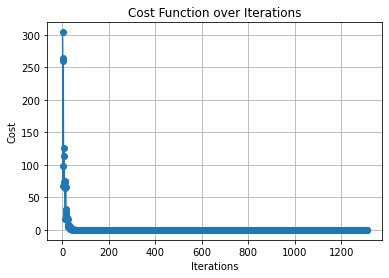

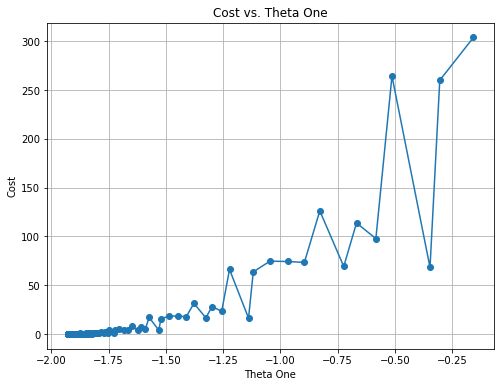

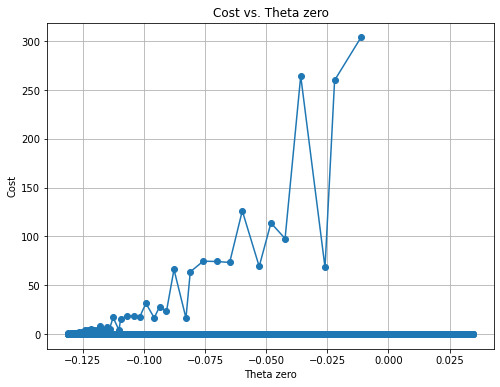

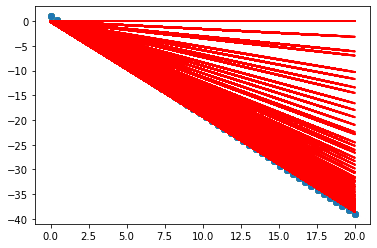

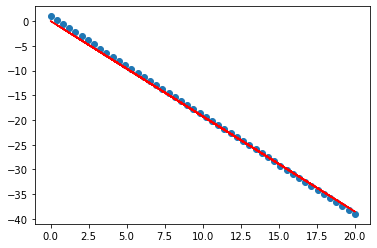

In [384]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

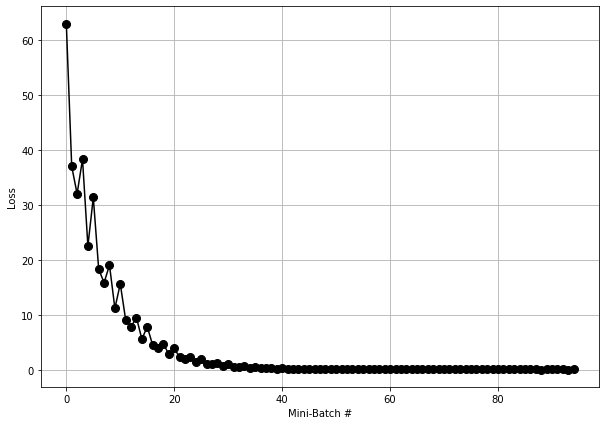

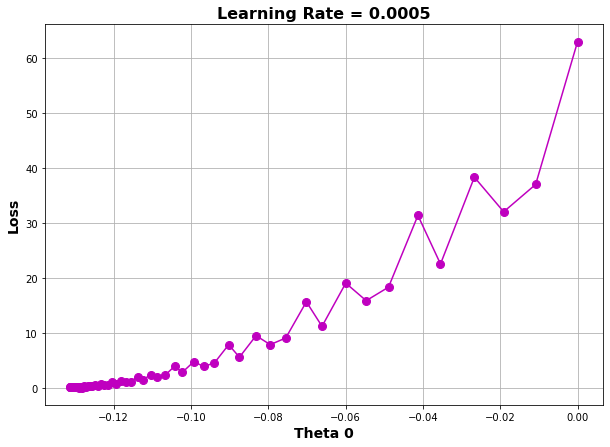

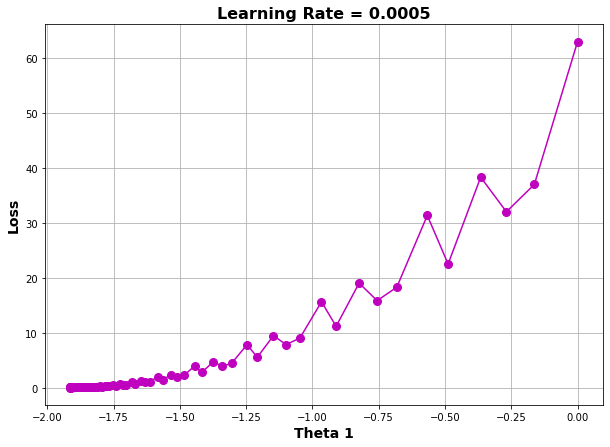

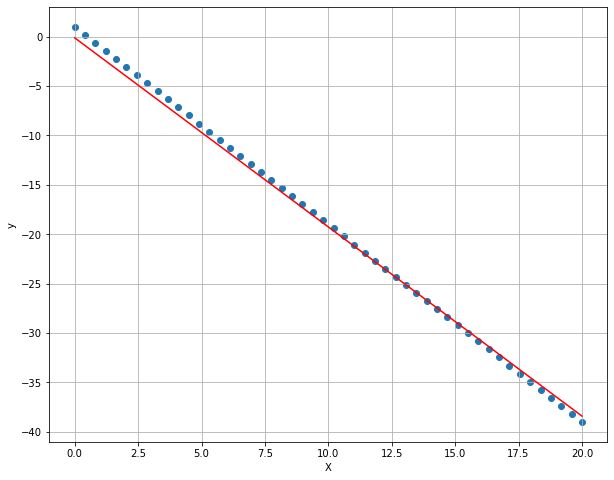

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [385]:
um_columns = X.shape[1]  # Assuming x2 is a NumPy array with multiple columns
theta = np.zeros((um_columns, 1))
theta
batch_size=20
alpha = 0.0005 #Learning rate
iterations = 300 #Number of iterations
#theta = np.zeros(x2.shape[1]) 
# Perform gradient descent to obtain the optimized theta values
cost_list,error,best_theta,gradient,theta_0,theta_1,hx,cost_list_batch,theta_0_batch,theta_1_batch= mini_batch_gradient_descent(X, y, theta, alpha, iterations,batch_size)


****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

r2_score 0.9975575226128095


In [386]:
from sklearn.metrics import r2_score
y_new=X@best_theta
r2_score(y_new,y)

0.9977658248187747

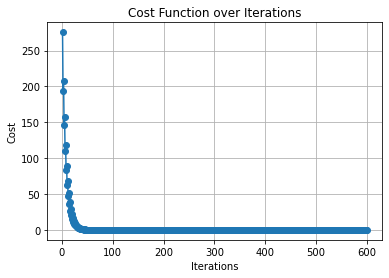

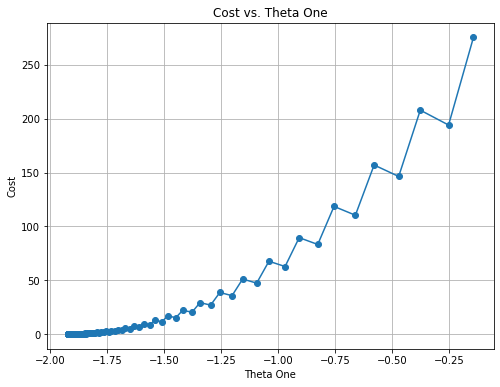

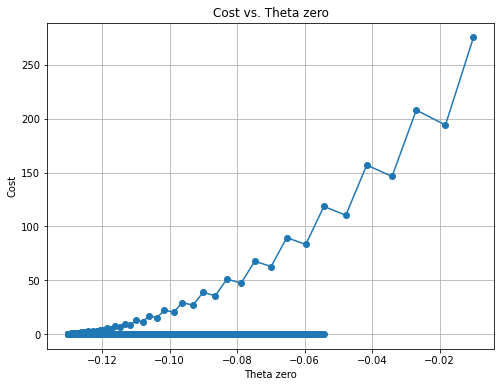

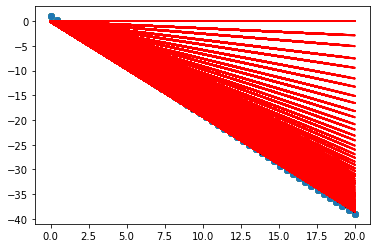

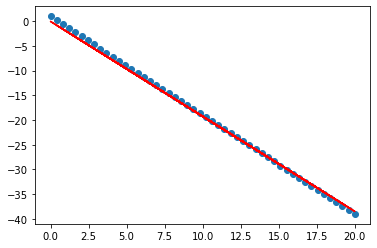

In [387]:
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_1, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta One')
plt.xlabel('Theta One')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.plot(theta_0, cost_list, marker='o', linestyle='-')
plt.title('Cost vs. Theta zero')
plt.xlabel('Theta zero')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
XX=data_matrix[:,0]
plt.scatter(XX, y)
for i in range(len(hx)):
    plt.plot(XX, hx[i], color='red', linewidth=2, label='LinePlot')
    plt.scatter(XX,y)
plt.show()  
plt.scatter(XX, y)
plt.plot(XX, hx[-1],color='red')
plt.show()

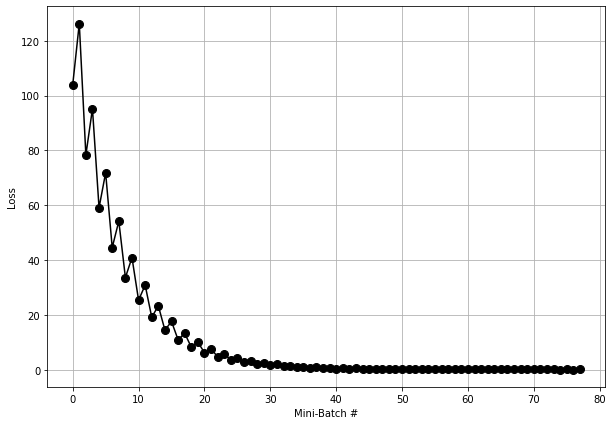

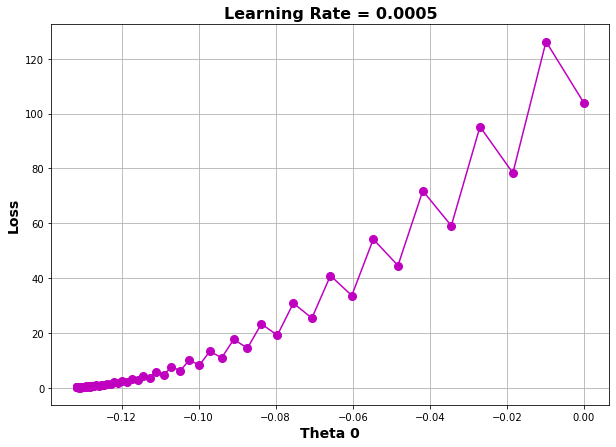

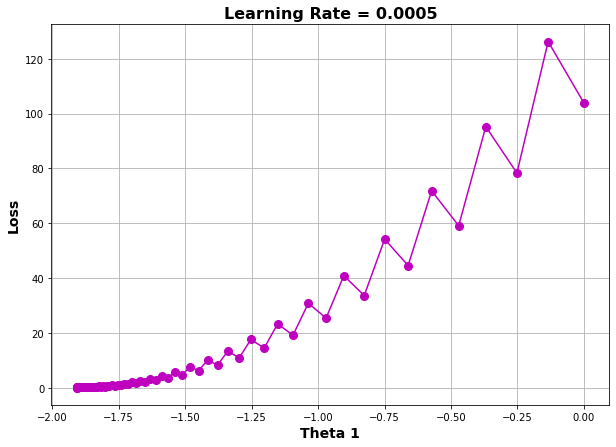

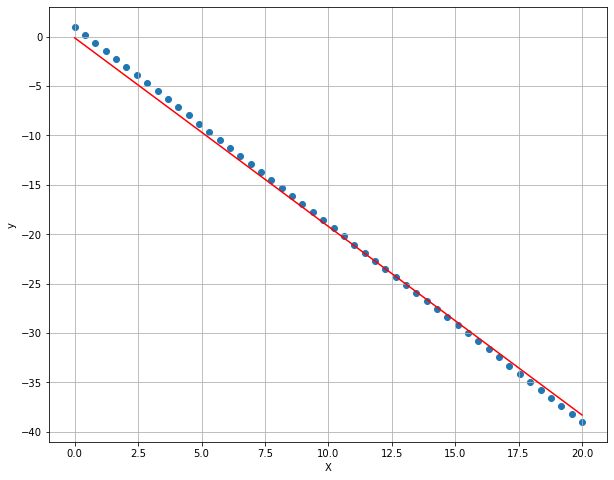